# 딥러닝의 통계적 이해 - 3장 예제

<p style='text-align: right;'> 2021.09.25. </p>
<p style='text-align: right;'> 발표자 최경호 </p>

---
[colab에서 열기](https://colab.research.google.com/github/attagungho/knou/blob/main/SUD/0904_ch3_practice.ipynb)
---
<a id="index"></a>
+ 목차
  + [딥러닝의 발전](#brief)
  + [86p 예제 3.1](#p31)
  + [91p 예제 3.2](#p32)
  + [92p 예제 3.3](#p33)

<a id="brief"></a>
## 딥러닝의 발전

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumBarunGothic'

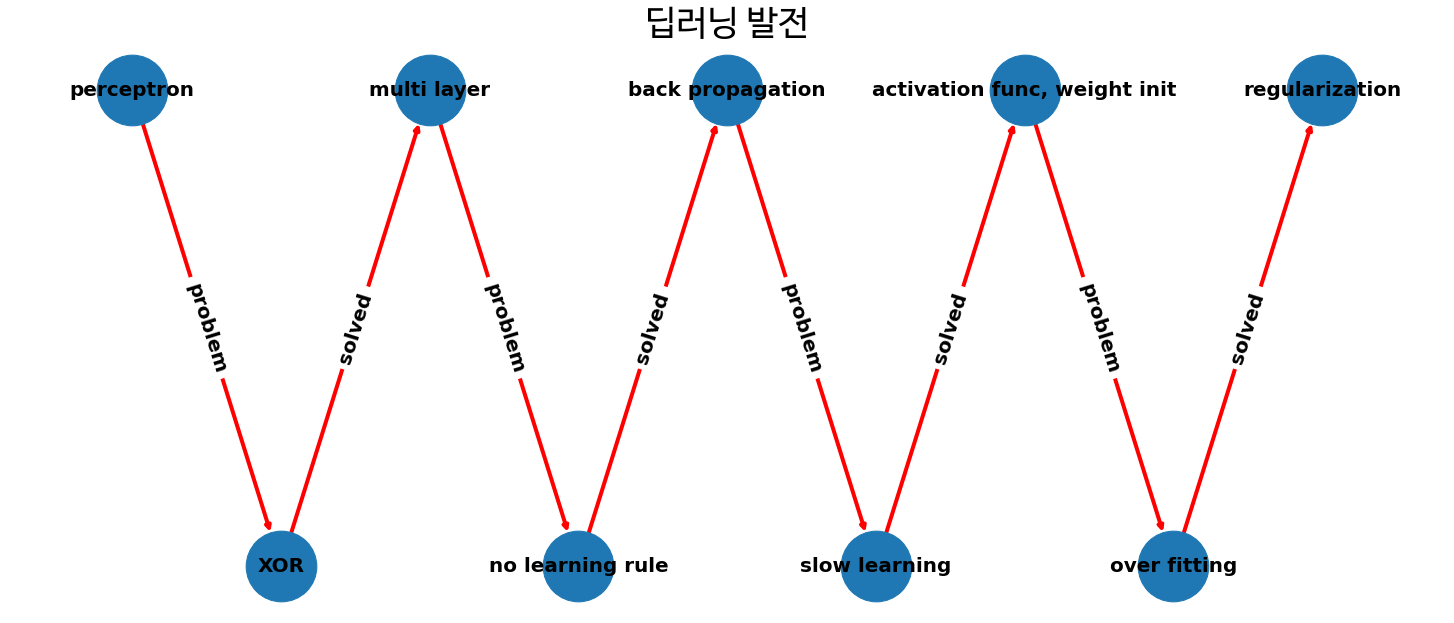

In [2]:
fig=plt.figure(figsize=(20,8))

pos = {0: (10,15), 1: (15,10), 2: (20,15), 3: (25,10), 4: (30,15), 5 : (35,10), 6: (40,15), 7 : (45,10), 8 : (50,15)} 

htr = nx.DiGraph()

htr.add_nodes_from(pos.keys())
for n, p in pos.items():
    htr.nodes[n]['pos'] = p

htr.add_weighted_edges_from([(0, 1, 'problem'), (1, 2, 'solved'), (2, 3,'problem'), (3, 4, 'solved'), (4, 5, 'problem'), (5,6,'solved'), (6,7,'problem'), (7,8,'solved')], color='red')

nx.draw(htr, pos, node_size= 5000, edge_color='r', width=4, with_labels=False)

node_labels = {0:'perceptron', 1:'XOR', 2:'multi layer', 3:'no learning rule', 4:'back propagation', 5:'slow learning', 6:'activation func, weight init', 7: 'over fitting', 8:'regularization'}
nx.draw_networkx_labels(htr, pos, node_labels, font_weight='bold', font_size=20)

edge_labels = nx.get_edge_attributes(htr,'weight')
nx.draw_networkx_edge_labels(htr, pos, edge_labels = edge_labels, font_weight='bold', font_size=20)

plt.title('딥러닝 발전', fontsize=35)
plt.show()

[목차로](#index)

<a id="p31"></a>
## 86페이지 예제 3.1

**$z=(x+y)^2$ 을 $x$에 대해 편미분 하라.**

<br>

$$ \begin{aligned}
z &= t^2 \\
t &= x+y 
\end{aligned}$$
  + 합성함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱이다.
$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}\cdot \frac{\partial t}{\partial x} $$
  + 편미분의 부분 부분을 계산하면 아래와 같다.
$$ \begin{aligned}
\frac{\partial z}{\partial t} &= \frac{\partial t^2}{\partial t} = 2t \\
\frac{\partial t}{\partial x} &= \frac{\partial (x+y)}{\partial x} = 1 
\end{aligned} $$
  + 최종 미분 결과
$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial t}\cdot \frac{\partial t}{\partial x} = 2t \cdot 1 = 2t = 2(x+y) $$

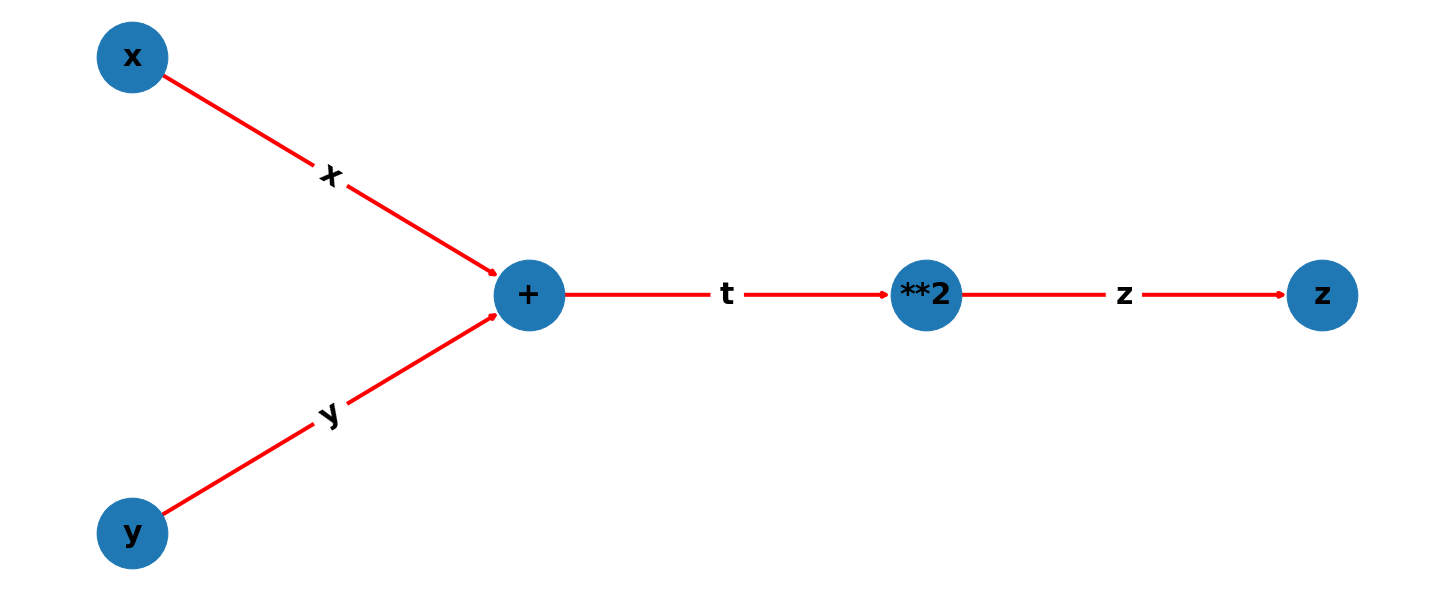

In [3]:
fig=plt.figure(figsize=(20,8))

pos = {0: (10,30), 1: (10,10), 2: (20,20), 3: (30,20), 4: (40,20)} 

pr1 = nx.DiGraph()

pr1.add_nodes_from(pos.keys())
for n, p in pos.items():
    pr1.nodes[n]['pos'] = p

pr1.add_weighted_edges_from([(0, 2, 'x'), (1, 2, 'y'), (2, 3,'t'), (3, 4, 'z')], color='red')

nx.draw(pr1, pos, node_size= 5000, edge_color='r', width=4, with_labels=False)

node_labels = {0:'x', 1:'y', 2:'+', 3:'**2', 4:'z'}
nx.draw_networkx_labels(pr1, pos, node_labels, font_weight='bold', font_size=30)

edge_labels = nx.get_edge_attributes(pr1,'weight')
nx.draw_networkx_edge_labels(pr1, pos, edge_labels = edge_labels, font_weight='bold', font_size=30)

plt.show()

[목차로](#index)

<a id="p32"></a>
## 91페이지 예제 3.2

**그림 3.12의 신경망에서 출력층 관련 가중치 중 하니인 $w_{22}^{(2)}$에 대한 손실함수의 미분을 연쇄법칙으로 구하라.**

단 손실함수는 아래와 같다.
$$J(w) = \frac{1}{2} \sum_{i=1}^n (y_i-o_i)^2$$



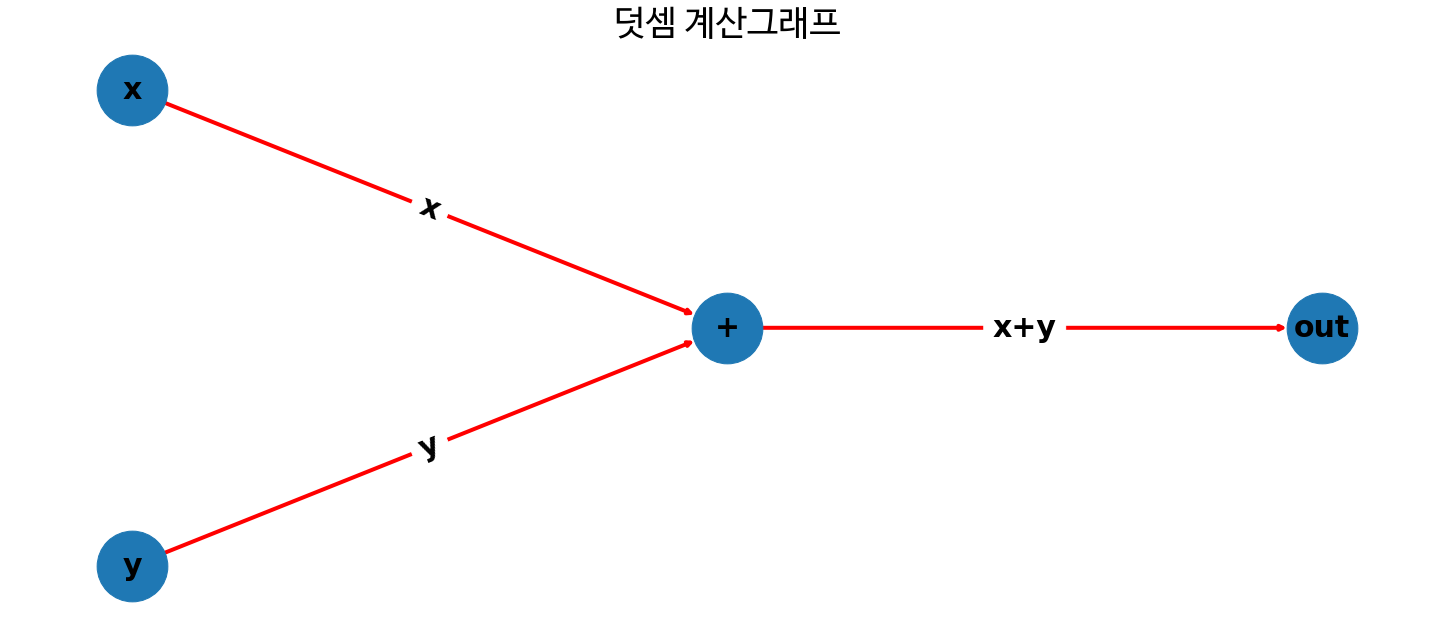

In [4]:
fig=plt.figure(figsize=(20,8))

pos = {0: (5,20), 1: (5,10), 2: (10,15), 3: (15,15)} 

gr = nx.DiGraph()

gr.add_nodes_from(pos.keys())
for n, p in pos.items():
    gr.nodes[n]['pos'] = p

gr.add_weighted_edges_from([(0, 2, 'x'), (1, 2, 'y'), (2, 3,'x+y')], color='red')

nx.draw(gr, pos, node_size= 5000, edge_color='r', width=4, with_labels=False)

node_labels = {0:'x', 1:'y', 2:'+', 3:'out'}
nx.draw_networkx_labels(gr, pos, node_labels, font_weight='bold', font_size=30)

edge_labels = nx.get_edge_attributes(gr,'weight')
nx.draw_networkx_edge_labels(gr, pos, edge_labels = edge_labels, font_weight='bold', font_size=30)

plt.title('덧셈 계산그래프', fontsize=35)
plt.show()

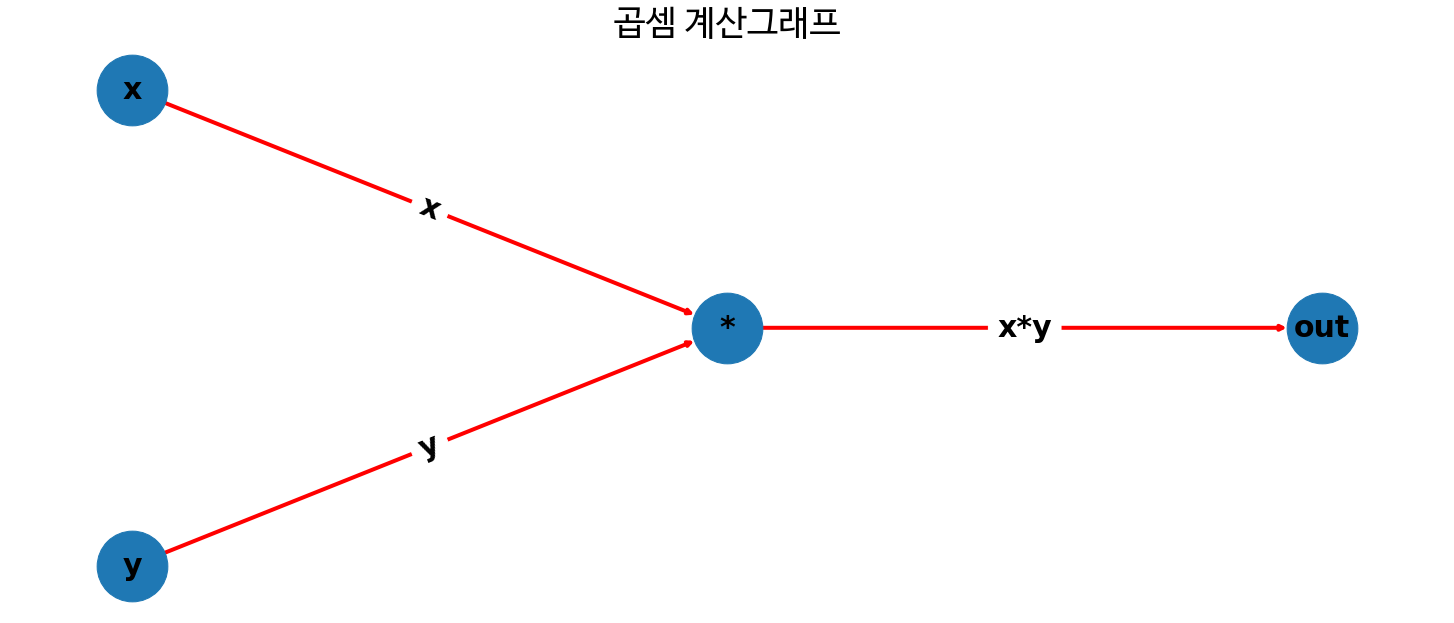

In [5]:
fig=plt.figure(figsize=(20,8))

pos = {0: (5,20), 1: (5,10), 2: (10,15), 3: (15,15)} 

gr = nx.DiGraph()

gr.add_nodes_from(pos.keys())
for n, p in pos.items():
    gr.nodes[n]['pos'] = p

gr.add_weighted_edges_from([(0, 2, 'x'), (1, 2, 'y'), (2, 3,'x*y')], color='red')

nx.draw(gr, pos, node_size= 5000, edge_color='r', width=4, with_labels=False)

node_labels = {0:'x', 1:'y', 2:'*', 3:'out'}
nx.draw_networkx_labels(gr, pos, node_labels, font_weight='bold', font_size=30)

edge_labels = nx.get_edge_attributes(gr,'weight')
nx.draw_networkx_edge_labels(gr, pos, edge_labels = edge_labels, font_weight='bold', font_size=30)

plt.title('곱셈 계산그래프', fontsize=35)
plt.show()

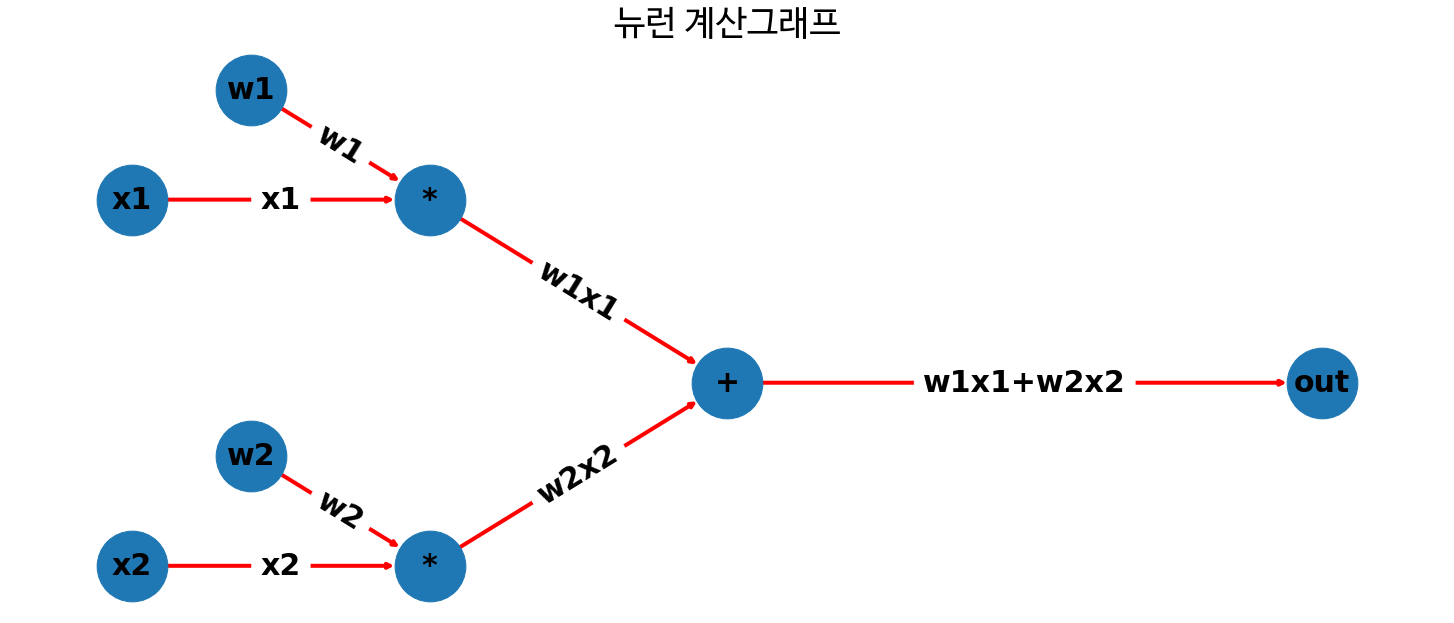

In [6]:
fig=plt.figure(figsize=(20,8))

pos = {0: (10,20), 1: (10,10), 2: (12,23), 3: (12,13), 4: (15,20), 5: (15,10), 6: (20,15), 7: (30,15)} 

neuron = nx.DiGraph()

neuron.add_nodes_from(pos.keys())
for n, p in pos.items():
    neuron.nodes[n]['pos'] = p

neuron.add_weighted_edges_from([(0, 4, 'x1'), (1, 5, 'x2'), (2, 4,'w1'), (3, 5, 'w2'), (4,6,'w1x1'), (5,6,'w2x2'), (6,7,'w1x1+w2x2')], color='red')

nx.draw(neuron, pos, node_size= 5000, edge_color='r', width=4, with_labels=False)

node_labels = {0:'x1', 1:'x2', 2:'w1', 3:'w2', 4:'*', 5:'*', 6:'+', 7:'out'}
nx.draw_networkx_labels(neuron, pos, node_labels, font_weight='bold', font_size=30)

edge_labels = nx.get_edge_attributes(neuron,'weight')
nx.draw_networkx_edge_labels(neuron, pos, edge_labels = edge_labels, font_weight='bold', font_size=30)

plt.title('뉴런 계산그래프', fontsize=35)
plt.show()

In [ ]:
fig=plt.figure(figsize=(20,8))

pos = {0: (10,20), 1: (10,10), 2: (12,23), 3: (12,13), 4: (15,20), 5: (15,10), 6: (20,20), 7: (20,10), 8:(25, 15), 9:(29,18), 10:(30, 15), 11:(35,15)} 

loss_func = nx.DiGraph()

loss_func.add_nodes_from(pos.keys())
for n, p in pos.items():
    loss_func.nodes[n]['pos'] = p

loss_func.add_weighted_edges_from([(0, 4, ''), (1, 5, ''), (2, 4,''), (3, 5, ''), (4,6,''), (5,7,''), (6,8,''), (7,8,''), (8,10,''), (9,10,''), (10,11,'')], color='red')

nx.draw(loss_func, pos, node_size= 5000, edge_color='r', width=4, with_labels=False)

node_labels = {0:'o1', 1:'o2', 2:'y1', 3:'y2', 4:'-', 5:'-', 6:'**2', 7:'**2', 8:'+', 9:'1/2', 10:'*', 11:'Loss'}
nx.draw_networkx_labels(loss_func, pos, node_labels, font_weight='bold', font_size=30)

edge_labels = nx.get_edge_attributes(loss_func,'weight')
nx.draw_networkx_edge_labels(loss_func, pos, edge_labels = edge_labels, font_weight='bold', font_size=30)

plt.title('손실함수 계산그래프', fontsize=35)
plt.show()

In [ ]:
fig=plt.figure(figsize=(20,8))

pos = {0: (5,20), 1: (5,10), 2: (10,23), 3: (10,17), 4: (10,13), 5: (10,7), 6: (15,20), 7: (15,10), 8:(18,20), 9:(18,10), 10:(23, 23), 11:(23, 17), 12:(23, 13), 13:(23, 7), 14:(28, 20), 15:(28, 10), 16:(30, 20), 17:(30, 10)} 

pr2 = nx.DiGraph()

pr2.add_nodes_from(pos.keys())
for n, p in pos.items():
    pr2.nodes[n]['pos'] = p

pr2.add_weighted_edges_from([(0, 2, ''), (0, 4, ''), (1, 3,''), (1, 5, ''), (2,6,'w11*x1'), (3,6,'w21*x2'), (4,7,'w12*x1'), (5,7,'w22*x2'), (6,8,''), (7,9,''), (8,10,''), (8,12,''), (9,11,''), (9,13,''), (10,14,'w112*h1'), (11,14,'w122*h1'), (12,15,'w212*h2'), (13,15,'w222*h2'), (14,16,''), (15,17,'')], color='red')

nx.draw(pr2, pos, node_size= 5000, edge_color='r', width=4, with_labels=False)

node_labels = {0:'x1', 1:'x2', 2:'*', 3:'*', 4:'*', 5:'*', 6:'+', 7:'+', 8:'h1', 9:'h2', 10:'*', 11:'*', 12:'*', 13:'*', 14:'+', 15:'+', 16:'o1', 17:'o2'}
nx.draw_networkx_labels(pr2, pos, node_labels, font_weight='bold', font_size=30)

edge_labels = nx.get_edge_attributes(pr2,'weight')
nx.draw_networkx_edge_labels(pr2, pos, edge_labels = edge_labels, font_weight='bold', font_size=20)

plt.show()

[목차로](#index)

<a id="p33"></a>
## 92페이지 예제 3.3
```
붓꽃 데이터에서 붓꽃의 세종 150개의 데이터를 뽑아서 세 종을 꽃받침의 넓이와, 길이, 꽃잎의 넓이와 길이를 바탕으로 신경망 모형을 작성하라.
```

In [ ]:
from sklearn.datasets import load_iris  # iris 데이터 가져오려고
import tensorflow as tf # 
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

print(tf.__version__)

In [ ]:
iris = load_iris()

In [ ]:
x = iris.data
y = iris.target

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
model = keras.models.Sequential([
  Dense(5, activation='relu', input_shape=(4,), name='dense'),
  Dense(5, activation='relu', name='dense_1'),
  Dense(3, activation='softmax', name='dense_2')
])
model.summary()

+ params 수 생각해 보기

In [ ]:
plot_model(model)

In [ ]:
%%time
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(x, y, epochs=300, validation_split=0.2, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','acc','val_acc'], loc='upper right')
plt.show()

In [ ]:
model.layers[0].weights

In [ ]:
model.layers[1].weights

In [ ]:
model.layers[2].weights

In [ ]:
type(x)

In [ ]:
import numpy as np
x_sample = np.array([[4.5, 3.0, 1.5, 0.5],
                     [5.0, 2.2, 3.1, 1.4],
                     [7.0, 3.3, 5.9, 3.0]])

In [ ]:
x_sample.shape

In [ ]:
model.predict(x_sample)